In [1]:
import json
import os
import pickle
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tabulate
import numpy as np
import math

from itertools import cycle, islice


In [2]:
fig_width = 8
fig_height = 5

params = {
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
    #'text.fontsize': 8, # was 10
    'legend.fontsize': 12, # was 10
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': False,
    'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif',
    'grid.linestyle': '--',
}

matplotlib.rcParams.update(params)

In [3]:
data_dir = 'priv_data'
out_dir = 'out'
appname = 'cumulated_citation-network-v1_schemex-test-1'
appname = 'citation-network_schemex-test-1'
appname = 'cumulated_citation-network-v11_schemex-test-1'
suffix = ''

In [4]:
iterations = 10

cumulated = {}
for i in range(0, iterations):
    with open(os.path.join(data_dir, appname + '-completenessAnalysisExport'+str(i)+'.csv'), 'r') as f:
        df = pd.read_csv(f, sep=',')
    df.head()
    
    for index, row in df.iterrows():
        key = str(row['Schema hash'])
        value = str(row['instance count'])
        
        if key in cumulated:
            tmp = cumulated[key]
            tmp[i] = value
        else:
            tmp = {}
            tmp[i] = value
        cumulated[key] = tmp


FileNotFoundError: [Errno 2] No such file or directory: 'priv_data/cumulated_citation-network-v11_schemex-test-1-completenessAnalysisExport0.csv'

In [5]:
with open(os.path.join(data_dir, appname + '-schemaInfoExport.csv'), 'r') as f:
    schemaFrame = pd.read_csv(f, sep=',')
schemaFrame.head()
#schemaFrame.set_index('Schema hash')
print(schemaFrame)


FileNotFoundError: [Errno 2] No such file or directory: 'priv_data/cumulated_citation-network-v11_schemex-test-1-schemaInfoExport.csv'

In [11]:
#print(cumulated)
df = pd.DataFrame()
for item in cumulated.items():
    values = buckets = [0] * iterations
    for i in range(0, iterations):
        if i in item[1]:
            values[i] = int(item[1][i])
    tmp = schemaFrame.loc[schemaFrame['Schema hash'] == int(item[0])]
    name = 'T:' + str(tmp['Type count'].item()) + ', P:' + str(tmp['Property count'].item())
    df[item[0] + ' -- ' + name] = values
    
#print(df)

/home/till/GIT/visualize-experiments/charts/env/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':


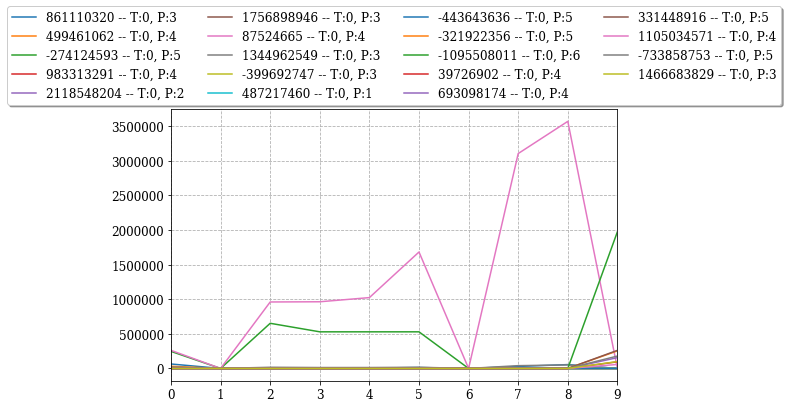

In [12]:
ax = df.plot(logy=False)#,yticks=([math.exp(w) for w in np.arange(1, 10, 2)]))
#ax.set_ylim([2500, 80000])
#plt.yticks(np.arange(0, iterations, 5.0))
#plt.
plt.xticks(np.arange(0, iterations, 1.0))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), shadow=True, ncol=4)
plt.grid(True)
plt.savefig(out_dir + '/' + appname + '-analysis.png')